In [1]:
import tensorflow as tf
from tensorflow import keras

# 1. Layers and Block

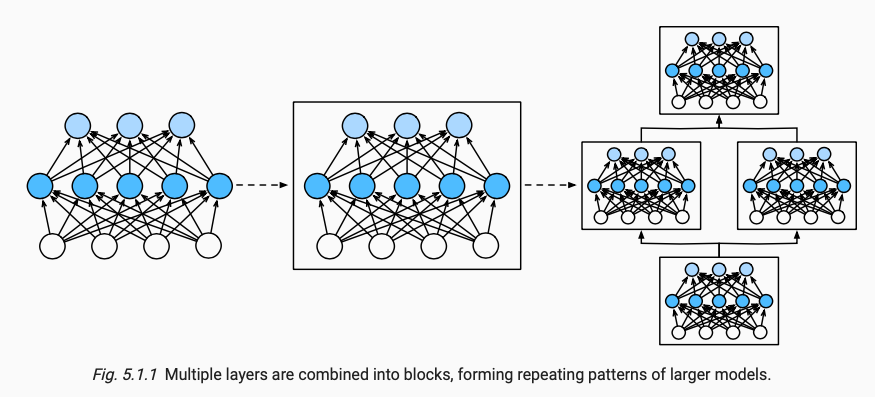

Layer merupakan arsitektur atau struktur yang berisi kumpulan node yang beroperasi secara dan di waktu yang bersamaan, yang mengambil informasi dari layer sebelumnya dan kemudian meneruskan informasi ke layer berikutnya. 

Block atau neural network blocks merupakan konsep di mana satu atau lebih layer digambarkan / diabstraksi menjadi satu komponen (block). Salah satu manfaat utama dari abstraksi blocks adalah blocks ini bisa lagi dikombinasikan menjadi struktur yang lebih besar (biasanya secara rekursif).


Dengan menggunakan konsep blocks ini, kita tetap dapat menulis kode yang ringkas dan masih mengimplementasikan neural net yang kompleks. Untuk mengimplementasikan blocks, kita membuat fungsi atau jika ingin fleksibel, kelas turunan dari tensorflow.keras.Model yang memiliki fungsi forward propagation (fungsi call()) . Contoh implementasi kode

In [2]:
# Data: digenerate secara random
X = tf.random.uniform((2, 20))

X

<tf.Tensor: shape=(2, 20), dtype=float32, numpy=
array([[0.35136175, 0.35520923, 0.6733538 , 0.50897133, 0.31880736,
        0.17945683, 0.5270933 , 0.14698446, 0.6919004 , 0.29117942,
        0.4912243 , 0.7085835 , 0.36781693, 0.29179347, 0.87563205,
        0.0175066 , 0.5969354 , 0.04154921, 0.5317761 , 0.12340248],
       [0.8022039 , 0.19236028, 0.47962582, 0.716393  , 0.43996704,
        0.62100613, 0.13433719, 0.089661  , 0.6186403 , 0.47792566,
        0.58700633, 0.89417017, 0.40449965, 0.913527  , 0.77300537,
        0.24984622, 0.81085026, 0.10258806, 0.7130023 , 0.5803523 ]],
      dtype=float32)>

In [3]:
block1 = keras.models.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10),
])

bentuk block nya :

In [4]:
class Block1(keras.Model):
    def __init__(self):
        super().__init__()
        self.layer_list= []
        self.layer_list.append(keras.layers.Dense(256, activation=tf.nn.relu))
        self.layer_list.append(keras.layers.Dense(10))
        self.layer_list.reverse()
    
    def call(self, X):
        result_temp= X

        # Melakukan forward propagation sampai layer terakhir dalam list 
        while bool(self.layer_list):
            result_temp= self.layer_list.pop()(result_temp)

        return result_temp
        # return 1

In [5]:
net= Block1()
net(X) # Sama saja dengan net.call(X)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[-0.00893709,  0.07890645, -0.24593392, -0.23425171, -0.19237283,
         0.05799684, -0.32086915, -0.22063825, -0.2364327 , -0.14478841],
       [-0.13942078,  0.0688267 , -0.07664671, -0.4345702 , -0.16397041,
         0.18770844, -0.28104693, -0.2283397 , -0.36737496, -0.2940012 ]],
      dtype=float32)>

Selanjutnya kita akan membuat block ke dua yang tidak mengandung layer satu per satu tapi mengandung model

In [6]:
class Block2(keras.Model):
    def __init__(self):
        super().__init__()
        self.net= keras.Sequential()
        self.net.add(keras.layers.Dense(256, activation=tf.nn.relu))
        self.net.add(keras.layers.Dense(10))
    
    def call(self, X):
        return self.net(X)

kemudian disatukan 

In [7]:
net= keras.Sequential()

# Menambahkan layer pertama yang mana merupakan block 2
net.add(Block2())

# Menambahkan block 1
net.add(Block1())

# # Menambahkan satu lagi layer dense biasa
net.add(keras.layers.Dense(10, activation= 'sigmoid'))

# Melakukan forward propagation
net(X)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.54849124, 0.42571267, 0.43493497, 0.4277062 , 0.49402162,
        0.4698719 , 0.39422822, 0.43776655, 0.4593031 , 0.54775226],
       [0.57661086, 0.41621545, 0.4357257 , 0.39069372, 0.475196  ,
        0.46590897, 0.3722481 , 0.42347032, 0.44698384, 0.55394566]],
      dtype=float32)>

# 2. Parameter Management

Parameter management atau manajemen parameter termasuk (Parameter dalam kasus neural network contohnya weight dan bias, fungsi loss atau learning rate merupakan hyperparameter):

Mengakses parameter untuk debugging, diagnostik, dan visualisasi.
Inisialisasi parameter.
Berbagi parameter dengan komponen model lain.
**Mengakses Parameter**

Model :

In [8]:
net = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1),
])

X = tf.random.uniform((2, 4))
net(X)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-0.3943746],
       [-0.5749406]], dtype=float32)>

Mengambil weight dari setiap layer net

In [9]:
net.weights
# Atau net.get_weights()

[<tf.Variable 'dense_9/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.03160042, -0.81428176,  0.24638349,  0.80832165],
        [ 0.41536146, -0.7437097 ,  0.3295756 , -0.2701543 ],
        [ 0.5062693 ,  0.25471777, -0.6522627 , -0.46759173],
        [ 0.38350767, -0.15631121,  0.7685873 , -0.65412366]],
       dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_10/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[-0.736699  ],
        [ 0.7798877 ],
        [ 0.22429872],
        [ 0.90729046]], dtype=float32)>,
 <tf.Variable 'dense_10/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

Untuk mendapatkan parameter pada layer yang ingin diakses, dilakukan dengan memanggil atribut .layers[index dari layer] dari model sequential. Misal layer yang ingin diakses parameternya yaitu layer indeks ke-1

In [10]:
net.layers[1]

untuk mengakses parameter weight dan bias

In [11]:
net.layers[1].weights

[<tf.Variable 'dense_9/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.03160042, -0.81428176,  0.24638349,  0.80832165],
        [ 0.41536146, -0.7437097 ,  0.3295756 , -0.2701543 ],
        [ 0.5062693 ,  0.25471777, -0.6522627 , -0.46759173],
        [ 0.38350767, -0.15631121,  0.7685873 , -0.65412366]],
       dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

Outputnya berupa array, indeks ke-0 merupakan weights, indeks ke-1 merupakan bias

Untuk layer yang berupa block (memiliki layer lagi di dalamnya), kita tetap bisa mengakses nya seperti ini:

net.layers[0].layers[1].layers[1].weights[1]

Inisialisasi Parameter

Secara default (untuk tensorflow), matriks weight diinisialisasikan berdasarkan range yang dikomputasi dari dimensi input dan output, sementara parameter bias mempunyai nilai default 0. 

Misal menginisialisasi weight sebagai variabel random Gaussian dengan standar deviasi 0.01, dan menginisialisasi parameter bias dengan nilai 0.

In [12]:
net = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(4, activation=tf.nn.relu, 
                       kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01), 
                       bias_initializer=tf.zeros_initializer()),
    keras.layers.Dense(1)
])

net(X)
net.layers[1].weights[0], net.layers[1].weights[1]

(<tf.Variable 'dense_11/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.004244  ,  0.00337141, -0.00089714,  0.00939054],
        [ 0.00404484,  0.01419446, -0.00780024,  0.00056092],
        [ 0.02252822,  0.01349338, -0.00038092,  0.01055359],
        [-0.00234991, -0.00933564, -0.01056862, -0.009529  ]],
       dtype=float32)>,
 <tf.Variable 'dense_11/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>)

Kita juga bisa menginisialisasikan weight yang berbeda pada setiap layer, misal weight layer dense kedua diisi dengan angka konstan 0.5.

In [13]:
net = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(4, activation=tf.nn.relu, 
                       kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.01), 
                       bias_initializer=tf.zeros_initializer()),
    keras.layers.Dense(4, activation=tf.nn.relu, 
                       kernel_initializer=keras.initializers.Constant(0.5), 
                       bias_initializer=tf.zeros_initializer()),
    keras.layers.Dense(1)
])

net(X)
net.layers[1].weights[0], net.layers[2].weights[0]

(<tf.Variable 'dense_13/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.01139264,  0.00902338, -0.01733514,  0.01181694],
        [ 0.00178561, -0.01283999, -0.02436594,  0.01749956],
        [ 0.01782889,  0.00590468,  0.0023986 , -0.00862308],
        [-0.00744691,  0.00700948,  0.01356959, -0.00139663]],
       dtype=float32)>,
 <tf.Variable 'dense_14/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5]], dtype=float32)>)

Kita juga bisa membuat subclass kita sendiri untuk inisialisasi weight jika cara di atas kurang flexibel, caranya yaitu kita membuat class subclass dari keras.initializers.Initializer , lalu mengimplementasikan method call(shape, dtype) yang me-return tensor (berisi weight inisial) yang isinya sesuai kemauan kita

In [14]:
# Di sini kita membuat class untuk inisialisasi weight
class MyInit(tf.keras.initializers.Initializer):
    def __call__(self, shape, dtype=None):
        data=tf.random.uniform(shape, -10, 10, dtype=dtype)
        factor=(tf.abs(data) >= 5)
        factor=tf.cast(factor, tf.float32)
        return data * factor

In [15]:
MyInit().__call__(shape=(3, 3), dtype=tf.float32)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.      ,  5.869646, -0.      ],
       [ 0.      ,  8.356098,  0.      ],
       [-0.      , -8.066473, -0.      ]], dtype=float32)>

In [16]:
net = keras.models.Sequential([
    keras.layers.Flatten(),
    # Memasukkan kelas initializer pada parameter kernel_initializer
    keras.layers.Dense(4, activation=tf.nn.relu, kernel_initializer=MyInit()),
    keras.layers.Dense(1),
])

net(X)
print(net.layers[1].weights[0])

<tf.Variable 'dense_16/kernel:0' shape=(4, 4) dtype=float32, numpy=
array([[ 8.823425 , -0.       ,  0.       , -8.045351 ],
       [ 0.       , -0.       , -0.       , -0.       ],
       [ 0.       , -0.       , -9.222522 ,  0.       ],
       [ 7.06654  , -5.988524 , -7.9296064, -8.371444 ]], dtype=float32)>


# 3. Deferred Initialization


Inisialisasi weight pada model ditangguhkan sebelum data di-pass ke model. Ini dikarenakan model masih belum mengetahui input shape dari data, maka dari itu model menangguhkan inisialisasi parameter, konsep ini juga membuat kita tidak perlu mendefinisikan input shape dari setiap layer, yang mana pastinya sangat membantu terutama jika dataset berupa gambar (yang mana mempunyai shape yang dinamis) 

Contohnya seperti kasus berikut, pertama-tama kita membuat model lalu memanggil weight nya

In [17]:
net = keras.models.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10),
])

In [18]:
[net.layers[i].get_weights() for i in range(len(net.layers))]

[[], []]

kita bisa melihat weight masih kosong karena belum di inisialiasi 

In [19]:
# Feed model dengan X
net(X)

[w.shape for w in net.get_weights()], net.layers[0].get_weights()[0]

([(4, 256), (256,), (256, 10), (10,)],
 array([[-9.2246845e-02, -5.8186933e-02,  1.7887831e-02, ...,
          1.1591476e-01, -3.4381352e-02,  5.4317906e-02],
        [ 9.3907893e-02, -9.9796273e-02,  1.8114597e-03, ...,
          5.6357652e-02,  4.5172274e-03,  1.3684300e-01],
        [ 1.3095996e-01, -7.8711212e-03,  1.3454950e-01, ...,
         -3.1724572e-05,  5.3725615e-02,  9.7419471e-02],
        [ 3.9892793e-03, -1.1646998e-01,  2.4907157e-02, ...,
         -4.5108110e-02,  6.2432736e-02,  9.9154979e-02]], dtype=float32))

Barulah setelah data di-pass weightnya terinisialisasi. Ini dinamakan Deferred Initialization (penangguhan inisialisasi).



# 4. Custom Layers

Pada kasus-kasus tertentu, kita berhadapan dengan masalah di mana kita membutuhkan layer yang belum pernah dibuat atau belum ada pada library, untuk mengatasi masalah tersebut, kita bisa membuat layer kustom kita sendiri. Membuat layer kustom sama saja seperti membuat blok. Terdapat 2 jenis kustom layer: layer tanpa atau dengan parameter (seperti weight atau bias)

Layer tanpa parameter
Layer tanpa parameter merupakan layer yang tidak mempunyai weight dan bias di dalamnya (seperti layer flatten). Misal kita ingin membuat layer yang mengurangi input dengan satu



In [20]:
class MinusOneLayer(keras.Model):
    def __init__(self):
        super().__init__()

    def call(self, input):
        return input - tf.ones(input.shape)

In [21]:
layer_wo_params= MinusOneLayer()
layer_wo_params(tf.constant([1.,2.,3.]))

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 1., 2.], dtype=float32)>

Implementasi 

In [22]:
net = keras.Sequential([keras.layers.Dense(128), MinusOneLayer()])

Layer dengan parameter
Layer dengan parameter mempunyai dan melibatkan weight dan bias pada operasinya. Misal kita ingin membuat layer dense yang berfungsi sama dengan layer dense pada umumnya (input * weight + bias lalu aktivasi). Walaupun kita mengatur/inisialisasi parameter semau kita, parameter juga tetap berubah saat proses back propagation

In [23]:
class MyDense(keras.Model):
    # Di sini kita berikan dua parameter saja yaitu untuk output dan aktivasi (tentu saja kita bisa menambahkannya sesuai kebutuhan)
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation= activation

    # Pada method build kita inisialisasi weight dan bias, fungsi build hanya dijalankan satu kali
    # Jadi weight dan bias tetap akan ter-update saat back propagation
    def build(self, X_shape):
        self.weight = self.add_weight(name='weight',
            shape=[X_shape[-1], self.units],
            initializer=tf.random_normal_initializer())
        self.bias = self.add_weight(
            name='bias', shape=[self.units],
            initializer=tf.zeros_initializer())

    # Pada fungsi call kita melakukan operasi (input * weight + bias lalu aktivasi)
    def call(self, X):
        linear = tf.matmul(X, self.weight) + self.bias

        if self.activation is None:
            return linear
        
        return self.activation(linear)

In [24]:
temp_dense= MyDense(5)
temp_dense(X)

temp_dense.get_weights()

[array([[ 0.06573838,  0.02506196,  0.08570775, -0.01739228,  0.03688849],
        [-0.0171283 ,  0.02713841,  0.00955756,  0.0513643 ,  0.05239109],
        [ 0.05843624,  0.02868359,  0.03444308, -0.07868617, -0.07515093],
        [ 0.06084059,  0.00825968, -0.07275146,  0.01610911, -0.02771608]],
       dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32)]

In [25]:
net= keras.Sequential([
    keras.layers.Flatten(),
    MyDense(128, tf.nn.relu), 
    MyDense(64, tf.nn.relu), 
    MyDense(32, tf.nn.relu), 
    MyDense(10, tf.nn.softmax)
])

net.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()
x_train, x_test= x_train/255, x_test/255

11501568/11490434 [==============================] - 0s 0us/step


In [27]:
net.fit(x_train, y_train, epochs=3, batch_size= 128)

Epoch 1/3
469/469 [==============================] - 5s 7ms/step - loss: 0.5537 - accuracy: 0.8315
Epoch 2/3
469/469 [==============================] - 3s 7ms/step - loss: 0.2054 - accuracy: 0.9398
Epoch 3/3
469/469 [==============================] - 4s 8ms/step - loss: 0.1453 - accuracy: 0.9566


In [28]:
net.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1329 - accuracy: 0.9587


[0.13287539780139923, 0.9587000012397766]

# File I/O

Save / Load Tensor
Untuk tensor, kita bisa menggunakan numpy.save(namaFile.npy, tensor) untuk menyimpan tensor dan  numpy.load(namaFile.npy) untuk memuatnya.

In [29]:
save_x= tf.constant(['a', 'b', 'c'])
save_x

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'a', b'b', b'c'], dtype=object)>

Save tensor

In [30]:
import numpy as np

np.save('save-x.npy', save_x)

model tensor


In [31]:
temp_x= np.load('save-x.npy', allow_pickle=True)
temp_x

array([b'a', b'b', b'c'], dtype=object)

* Save / Load Model Parameter

Misal model kita seperti ini

In [32]:
class MLP(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.hidden = tf.keras.layers.Dense(units=256, activation=tf.nn.relu)
        self.out = tf.keras.layers.Dense(units=10)

    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.hidden(x)
        return self.out(x)

net= MLP()

feed forward pada model

In [33]:
Y1= net(X)
Y1

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[-0.03806546, -0.00694636, -0.02068745, -0.12020075,  0.08110481,
        -0.05105237, -0.01377916, -0.0034493 ,  0.01596991, -0.06520844],
       [ 0.02536307, -0.03196215,  0.00140262, -0.14552845,  0.06032828,
        -0.13055927, -0.04241271, -0.02180977,  0.06303644, -0.12357817]],
      dtype=float32)>

In [34]:
net.save_weights('mlp.params')

Sekarang kita akan membuat model dengan arsitektur yang sama tapi tidak dilakukan feed forward, sebaliknya parameternya diambil/diload dari file parameter yang telah di-save sebelumnya

In [35]:
net_2= MLP()
net_2.load_weights('mlp.params')

# Feed forward
Y2= net_2(X)

Sekarang kita akan membandingkan variabel Y1 dengan Y2

In [36]:
Y1==Y2

<tf.Tensor: shape=(2, 10), dtype=bool, numpy=
array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])>

hasilnya adalah sama